In [125]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


Object Loop: 100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


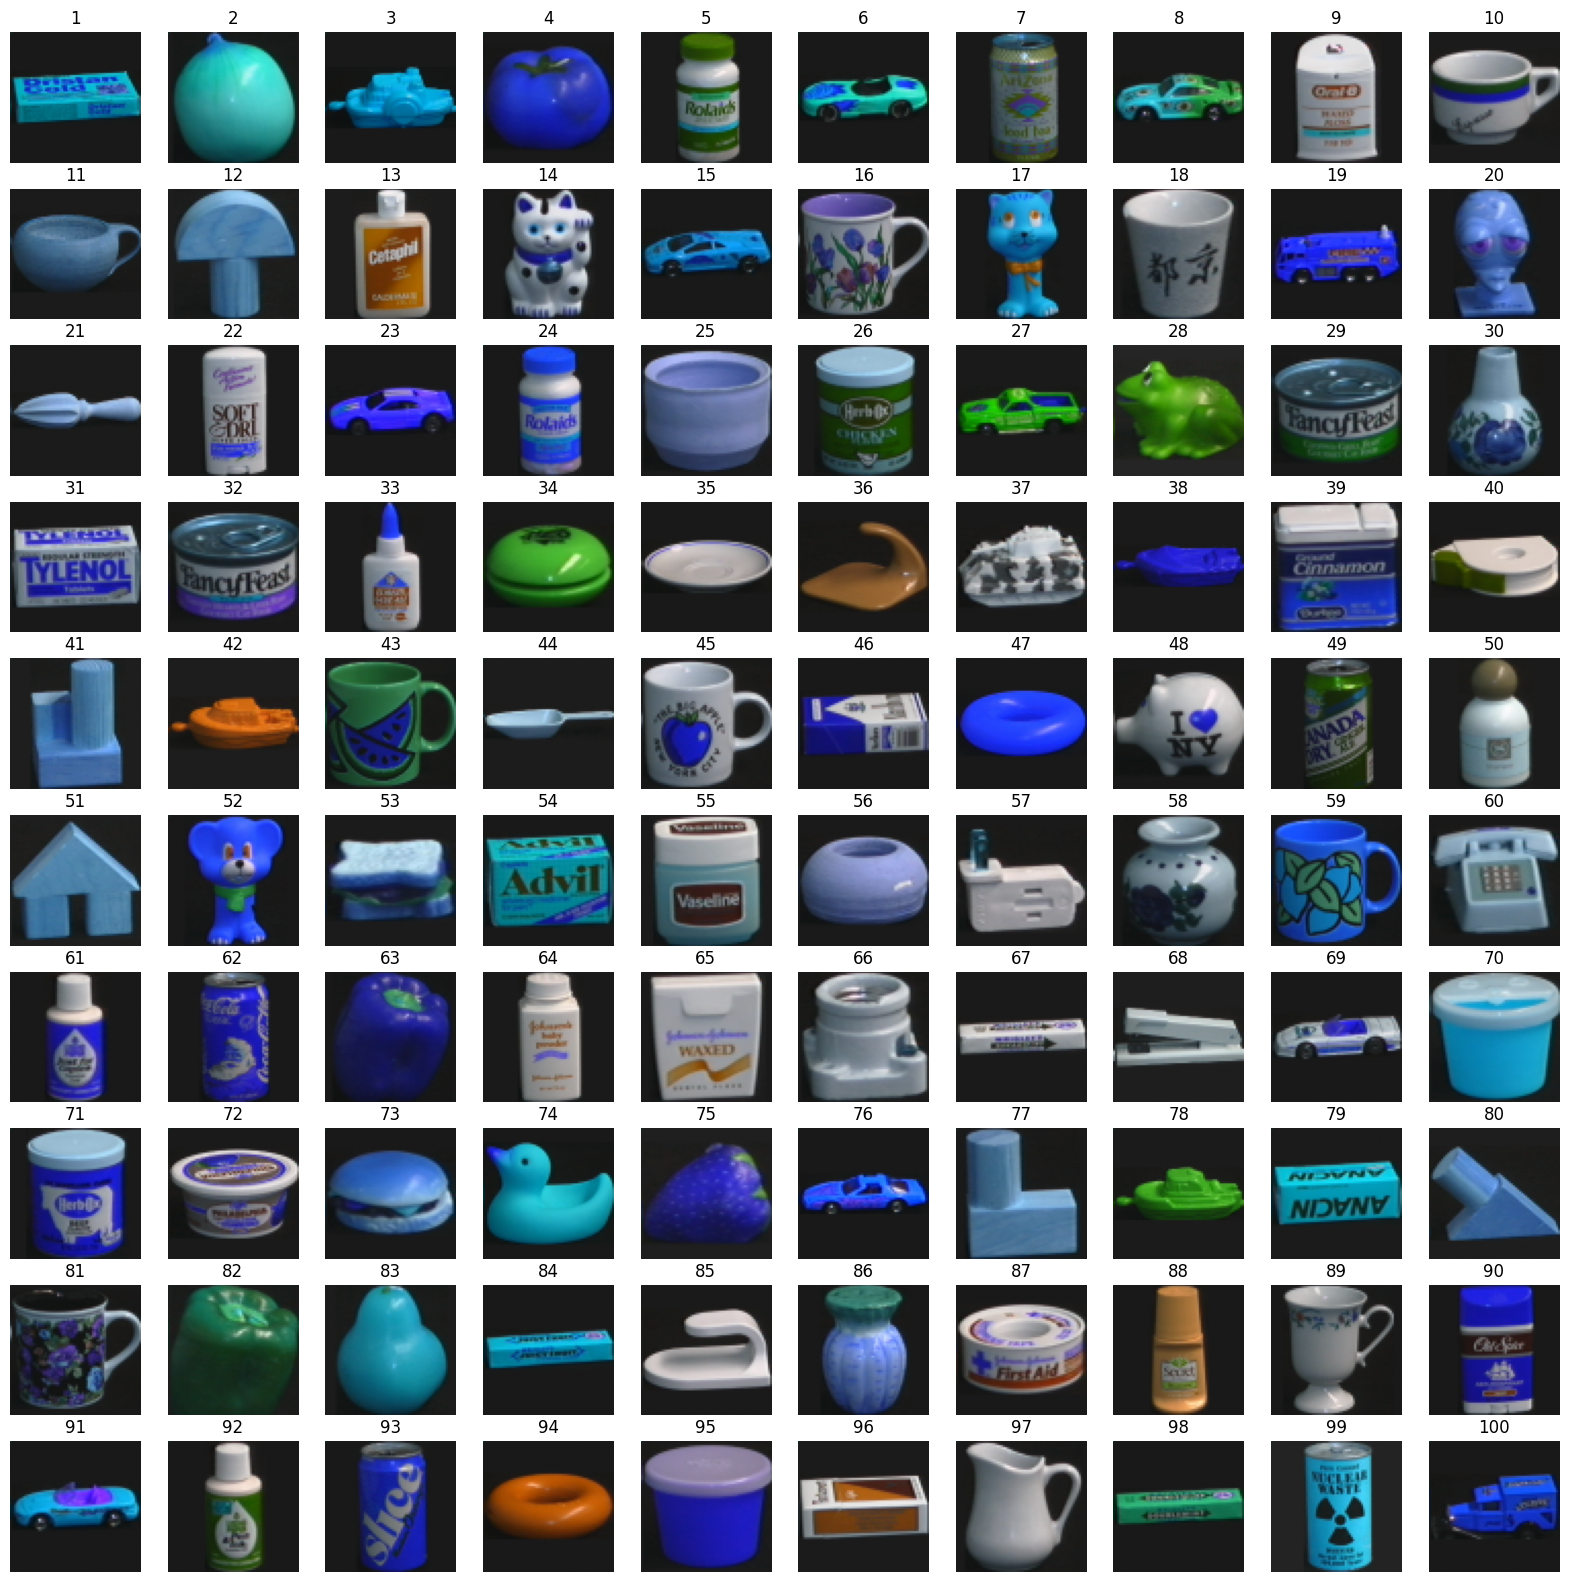

In [113]:
data = []
labels = []

plt.figure(figsize=(20, 20))
for obj_id in tqdm(range(1, 101), desc="Object Loop"):
    for angle in tqdm(range(0, 360, 5), desc="Angle Loop", leave=False):
        filename = f"obj{obj_id}__{angle}.png"
        filepath = os.path.join(f"./Data/coil-100/{filename}")
        # print(filepath)
        img = cv2.imread(filepath)
        img = cv2.resize(img, (64, 64))  # Resize if needed
        img = img / 255.0  # Normalize
        data.append(img)
        labels.append(obj_id - 1)
    ax = plt.subplot(10, 10, obj_id)
    plt.imshow(np.array(img))
    plt.title(str(obj_id))
    plt.axis("off")

data = np.array(data)
labels = np.array(labels)

In [114]:
coil100_labels = {
    1: 'Dristan Gold',
    2: 'Balloon with water',
    3: 'Ship',
    4: 'Tomato',
    5: 'Rolaids',
    6: 'Hot car',
    7: 'Arizona tea',
    8: 'Car with eyes',
    9: 'Oral',
    10: 'Cup with flag and signature',
    11: 'Clay cup',
    12: 'Mushroom',
    13: 'Cetaphil',
    14: 'Lucky cat',
    15: 'Car with big butt',
    16: 'Cup with flowers',
    17: 'Blue Orange cat with two legs',
    18: 'Chinese cup',
    19: 'RV car',
    20: 'Tired Alien',
    21: 'Squisher',
    22: 'Soft and dri',
    23: 'Simple purple car',
    24: 'Rolaids Blue',
    25: 'Clay cup for without support',
    26: 'Chicken from Herb',
    27: 'Green Truck',
    28: 'Frog',
    29: 'FancyFeast green can',
    30: 'Clay white blue vase',
    31: 'Tylenol Blue',
    32: 'FancyFeast purple can',
    33: 'Glue Blue',
    34: 'Green Macarone',
    35: 'Clay bowl Blue',
    36: 'Gray Desk',
    37: 'White Gray Tank',
    38: 'Blue Boat',
    39: 'Cinnamon Blue',
    40: 'Green Tape',
    41: 'Three Blue Figures',
    42: 'Orange Boat',
    43: 'Green Cup with Blue Watermelons',
    44: 'Scapula',
    45: 'White Cup with Blue Apple',
    46: 'Blue Milk',
    47: 'Blue Torus',
    48: 'Money Bank I love NY',
    49: 'Canada Dry Soda',
    50: 'Gray Milk',
    51: 'Blue House from Three Figures',
    52: 'Blue Green Bear with legs',
    53: 'Sandwich',
    54: 'Advil Blue',
    55: 'Vaseline',
    56: 'Light Blue Macarone',
    57: 'Extender',
    58: 'More Blue White Vase',
    59: 'Blue Cup with Blue berries',
    60: 'Stationary Phone',
    61: 'Blue Glue',
    62: 'Blue CocaCola',
    63: 'Big Blue Tomate',
    64: 'White Blue Glue',
    65: 'Waxed',
    66: 'Lamp receiver',
    67: 'Rubber',
    68: 'Stepler',
    69: 'Speed Car with no Roof',
    70: 'Happy Bucket',
    71: 'Herb Cow Milk',
    72: 'Gray Blue Food',
    73: 'Gamburger',
    74: 'Duck',
    75: 'Strawberry',
    76: 'Speed Car with Roof',
    77: 'Two Figures',
    78: 'Green Boat',
    79: 'Anacin',
    80: 'Two Figures Falling',
    81: 'Black Purple Cup',
    82: 'Green Big Tomato',
    83: 'Blue Peach',
    84: 'Blue Rubber',
    85: 'White Desk',
    86: 'Green Blue Vase',
    87: 'FirstAid Bondage',
    88: 'Orange Secret',
    89: 'Elegant cup',
    90: 'Blue Old Spice',
    91: 'Blue Purple speed Car with No Roof',
    92: 'Green Glue',
    93: 'Blue Slice',
    94: 'Orange Torus',
    95: 'Closed Bucket',
    96: 'Orange Box',
    97: 'Jug',
    98: 'Green Rubber',
    99: 'Nuclear Waste',
    100: 'Truck with Ice Cream'
}

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
# X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [116]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

In [117]:
def predict_random(model):
    choose = np.random.randint(0, X_test.shape[0])
    plt.imshow(X_test[choose])
    predictions = model.predict(X_test)
    # plt.title(f'Predicted Object: {np.argmax(predictions[choose]) + 1} | Real Object: {np.argmax(y_test[choose]) + 1}')
    plt.title(f'Predicted Object: {coil100_labels[np.argmax(predictions[choose]) + 1]} | Real Object: {coil100_labels[np.argmax(y_test[choose]) + 1]}')

In [118]:
def predict(model, batch_size=128, epochs=10):
    history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    display_history(history, ['loss', 'val_loss'], "Loss")
    display_history(history, ['accuracy', 'val_accuracy'], "Accuracy")
    model.evaluate(X_test, y_test)
    predict_random(model)

In [119]:
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

# 1 Conv2D 64

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,222,308 (16.11 MB)

 Trainable params: 4,222,180 (16.11 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 424ms/step - Top2: 0.5509 - accuracy: 0.4780 - loss: 2.8677 - val_Top2: 0.8944 - val_accuracy: 0.7306 - val_loss: 3.6094
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 426ms/step - Top2: 0.9972 - accuracy: 0.9895 - loss: 0.0443 - val_Top2: 0.9625 - val_accuracy: 0.9035 - val_loss: 3.1422
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 419ms/step - Top2: 0.9992 - accuracy: 0.9967 - loss: 0.0165 - val_Top2: 0.9889 - val_accuracy: 0.9514 - val_loss: 2.7172
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 399ms/step - Top2: 1.0000 - accuracy: 0.9979 - loss: 0.0105 - val_Top2: 0.9979 - val_accuracy: 0.9674 - val_loss: 2.2800
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - Top2: 0.9997 - accuracy: 0.9986 - loss: 0.0058 - val_Top2: 0.9951 - val_accuracy: 0.9611 - val_loss: 1.8463
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - Top2: 0.9998 - accuracy: 0.9987 - loss: 0.0074 - val_Top2: 0.9986 - val_accuracy: 0.9875 - val_loss: 1.3650
Epoch 7/10
45/45 ━━━━━

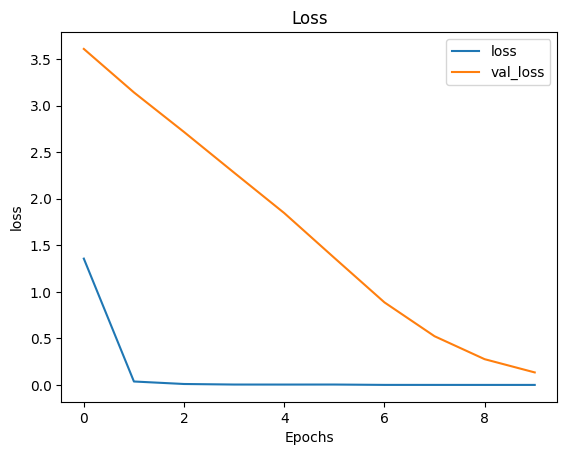

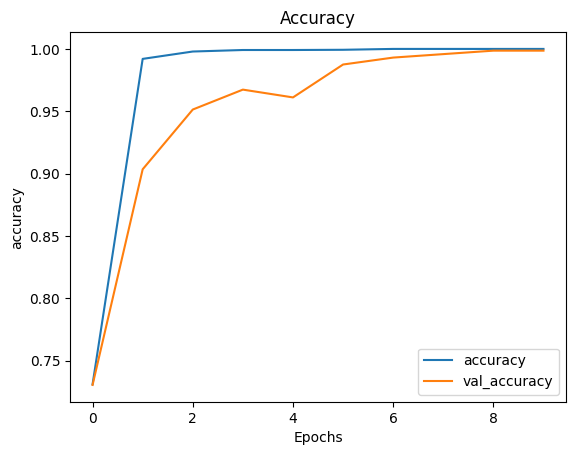

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - Top2: 1.0000 - accuracy: 0.9960 - loss: 0.1348
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


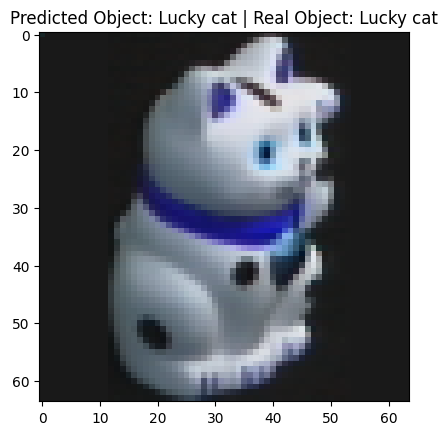

In [120]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# 1 Conv2D 64 + Dropout

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,222,308 (16.11 MB)

 Trainable params: 4,222,180 (16.11 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 537ms/step - Top2: 0.3818 - accuracy: 0.2942 - loss: 3.5681 - val_Top2: 0.8986 - val_accuracy: 0.7965 - val_loss: 3.9774
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 538ms/step - Top2: 0.9064 - accuracy: 0.8219 - loss: 0.6381 - val_Top2: 0.9056 - val_accuracy: 0.8153 - val_loss: 3.4557
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 574ms/step - Top2: 0.9705 - accuracy: 0.9207 - loss: 0.2646 - val_Top2: 0.9326 - val_accuracy: 0.8535 - val_loss: 2.8579
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 481ms/step - Top2: 0.9901 - accuracy: 0.9549 - loss: 0.1426 - val_Top2: 0.9722 - val_accuracy: 0.8986 - val_loss: 2.3750
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 600ms/step - Top2: 0.9907 - accuracy: 0.9652 - loss: 0.1181 - val_Top2: 0.9556 - val_accuracy: 0.8389 - val_loss: 1.9685
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 632ms/step - Top2: 0.9936 - accuracy: 0.9738 - loss: 0.0854 - val_Top2: 0.9868 - val_accuracy: 0.9556 - val_loss: 1.2830
Epoch 7/10
45/45 ━━━━━

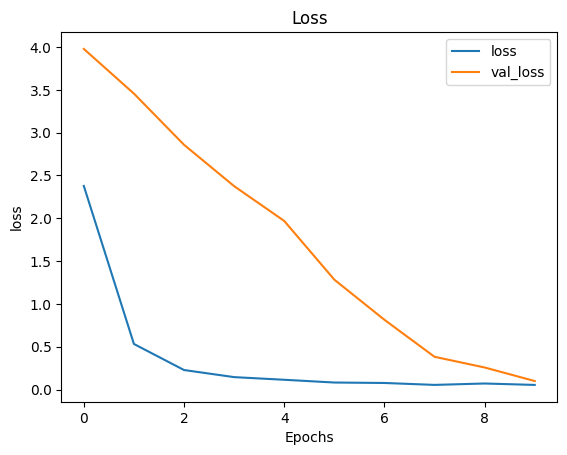

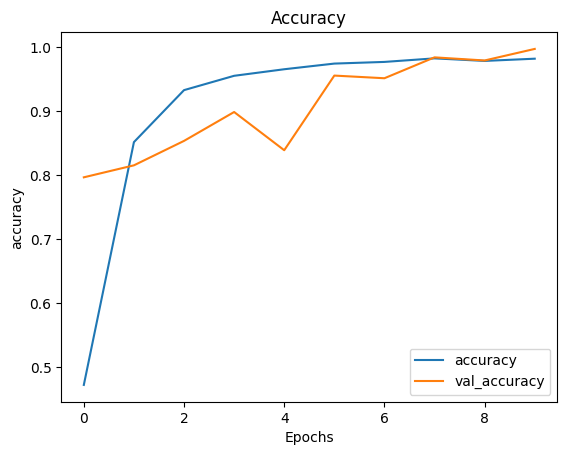

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - Top2: 1.0000 - accuracy: 0.9990 - loss: 0.0924
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


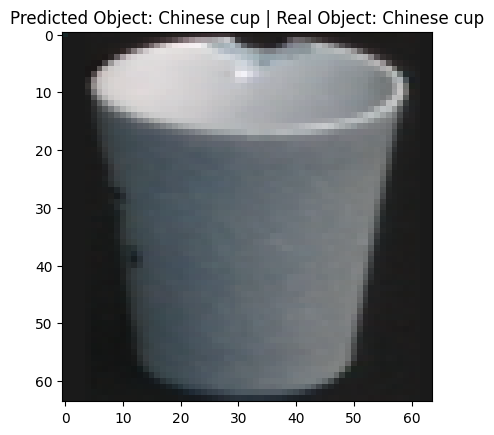

In [130]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


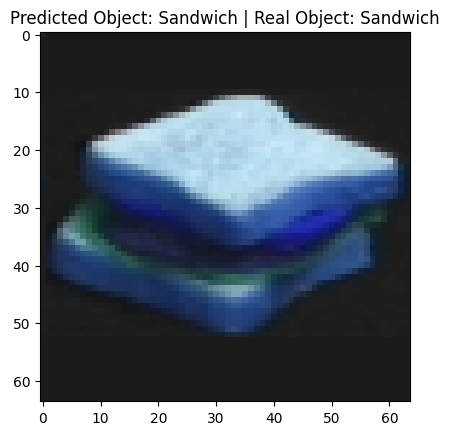

In [121]:
predict_random(model)

# 1 Conv2D 32

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,124,132 (8.10 MB)

 Trainable params: 2,124,068 (8.10 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - Top2: 0.6355 - accuracy: 0.5572 - loss: 2.0707 - val_Top2: 0.7257 - val_accuracy: 0.5396 - val_loss: 3.6058
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - Top2: 0.9993 - accuracy: 0.9879 - loss: 0.0409 - val_Top2: 0.9153 - val_accuracy: 0.7868 - val_loss: 3.1226
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - Top2: 0.9995 - accuracy: 0.9971 - loss: 0.0154 - val_Top2: 0.9569 - val_accuracy: 0.8965 - val_loss: 2.7757
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - Top2: 1.0000 - accuracy: 0.9978 - loss: 0.0060 - val_Top2: 0.9868 - val_accuracy: 0.9625 - val_loss: 2.2621
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - Top2: 1.0000 - accuracy: 0.9991 - loss: 0.0041 - val_Top2: 0.9951 - val_accuracy: 0.9771 - val_loss: 1.7441
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - Top2: 1.0000 - accuracy: 0.9986 - loss: 0.0037 - val_Top2: 0.9944 - val_accuracy: 0.9778 - val_loss: 1.2859
Epoch 7/10
45/45 ━━━━━━━━━━

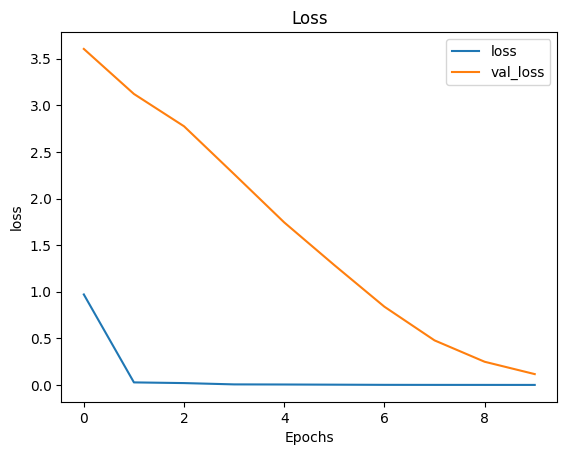

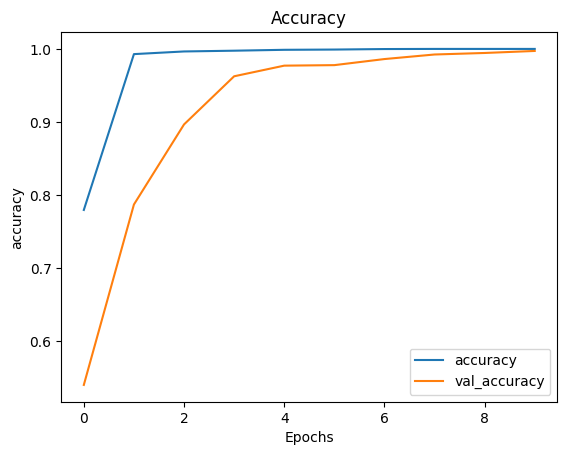

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Top2: 1.0000 - accuracy: 0.9985 - loss: 0.1131
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


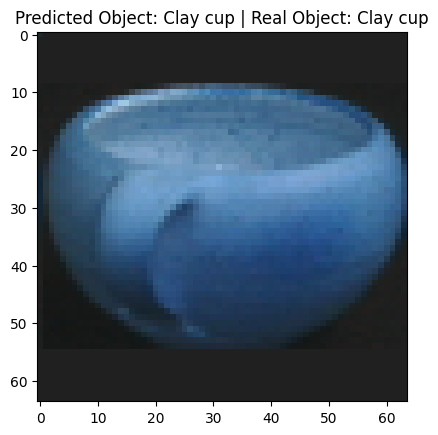

In [122]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# 1 Conv2D 32 + Dropout

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,124,132 (8.10 MB)

 Trainable params: 2,124,068 (8.10 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 284ms/step - Top2: 0.3764 - accuracy: 0.2885 - loss: 3.3368 - val_Top2: 0.7563 - val_accuracy: 0.5215 - val_loss: 3.9744
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - Top2: 0.9210 - accuracy: 0.8379 - loss: 0.5617 - val_Top2: 0.8951 - val_accuracy: 0.8007 - val_loss: 3.4362
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 288ms/step - Top2: 0.9789 - accuracy: 0.9355 - loss: 0.2204 - val_Top2: 0.9306 - val_accuracy: 0.8542 - val_loss: 2.8181
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - Top2: 0.9924 - accuracy: 0.9699 - loss: 0.1031 - val_Top2: 0.9646 - val_accuracy: 0.8965 - val_loss: 2.1799
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - Top2: 0.9939 - accuracy: 0.9757 - loss: 0.0931 - val_Top2: 0.9618 - val_accuracy: 0.8944 - val_loss: 1.5852
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - Top2: 0.9956 - accuracy: 0.9806 - loss: 0.0662 - val_Top2: 0.9882 - val_accuracy: 0.9583 - val_loss: 1.1367
Epoch 7/10
45/45 ━━━━━

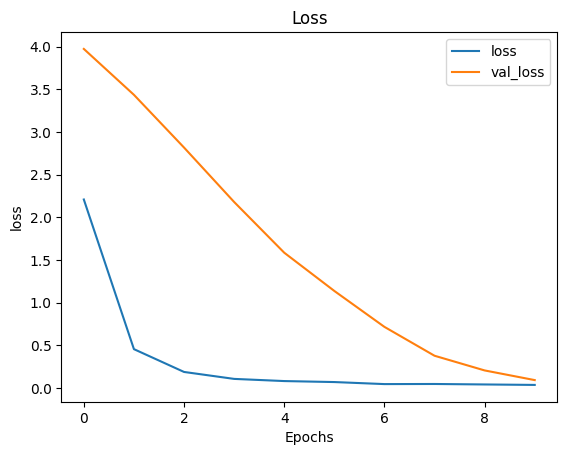

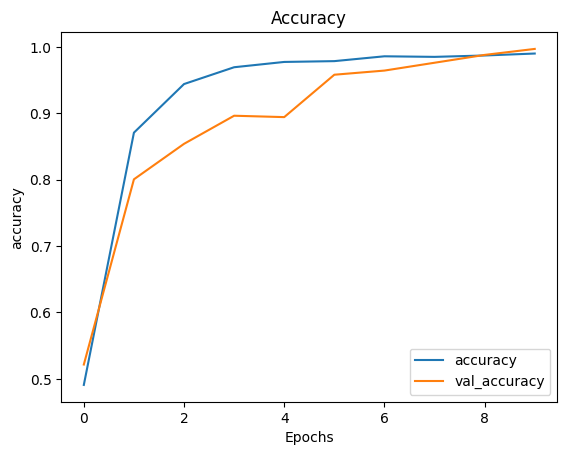

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Top2: 0.9999 - accuracy: 0.9991 - loss: 0.0841
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


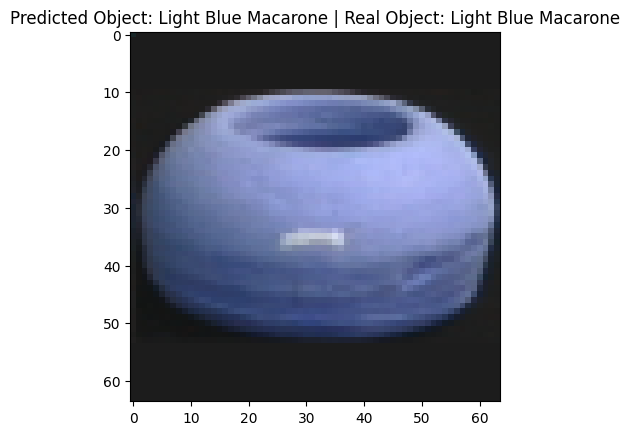

In [129]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# 2 Conv2D

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 626,660 (2.39 MB)

 Trainable params: 626,276 (2.39 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 472ms/step - Top2: 0.4848 - accuracy: 0.3973 - loss: 3.0246 - val_Top2: 0.0597 - val_accuracy: 0.0410 - val_loss: 4.3418
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - Top2: 0.9891 - accuracy: 0.9617 - loss: 0.1457 - val_Top2: 0.0403 - val_accuracy: 0.0104 - val_loss: 5.8938
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 453ms/step - Top2: 0.9998 - accuracy: 0.9931 - loss: 0.0319 - val_Top2: 0.0403 - val_accuracy: 0.0104 - val_loss: 7.1446
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - Top2: 1.0000 - accuracy: 0.9969 - loss: 0.0185 - val_Top2: 0.0403 - val_accuracy: 0.0104 - val_loss: 7.6109
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - Top2: 0.9995 - accuracy: 0.9987 - loss: 0.0092 - val_Top2: 0.0403 - val_accuracy: 0.0146 - val_loss: 7.3627
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 453ms/step - Top2: 1.0000 - accuracy: 1.0000 - loss: 0.0026 - val_Top2: 0.0431 - val_accuracy: 0.0222 - val_loss: 6.6113
Epoch 7/30
45/45 ━━━━━

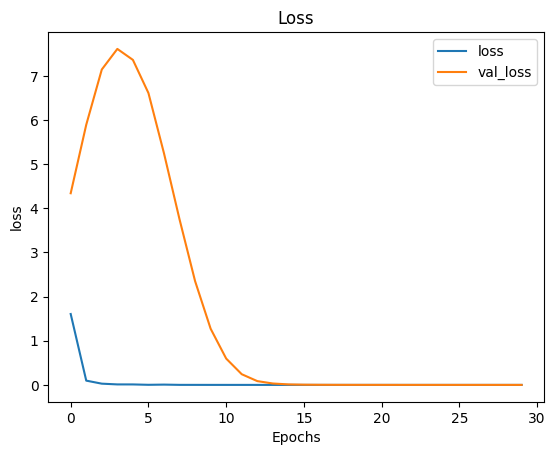

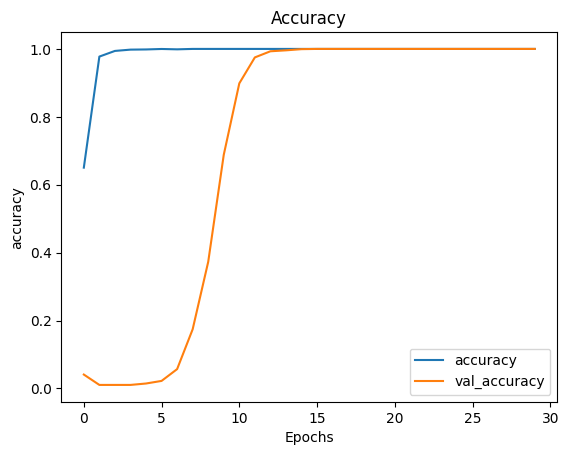

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - Top2: 1.0000 - accuracy: 1.0000 - loss: 7.5630e-04
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


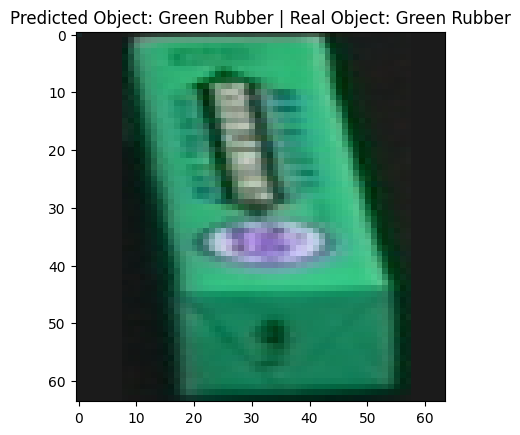

In [123]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, epochs=30)

# 2 Conv2D + Dropout

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 626,660 (2.39 MB)

 Trainable params: 626,276 (2.39 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 470ms/step - Top2: 0.1883 - accuracy: 0.1332 - loss: 4.7142 - val_Top2: 0.0528 - val_accuracy: 0.0250 - val_loss: 4.5906
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 458ms/step - Top2: 0.7143 - accuracy: 0.5729 - loss: 1.6025 - val_Top2: 0.0340 - val_accuracy: 0.0097 - val_loss: 7.9303
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 451ms/step - Top2: 0.9030 - accuracy: 0.7952 - loss: 0.6681 - val_Top2: 0.0208 - val_accuracy: 0.0097 - val_loss: 11.9165
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 449ms/step - Top2: 0.9593 - accuracy: 0.8918 - loss: 0.3625 - val_Top2: 0.0194 - val_accuracy: 0.0097 - val_loss: 13.9947
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - Top2: 0.9797 - accuracy: 0.9245 - loss: 0.2262 - val_Top2: 0.0194 - val_accuracy: 0.0097 - val_loss: 14.6930
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 458ms/step - Top2: 0.9875 - accuracy: 0.9549 - loss: 0.1549 - val_Top2: 0.0285 - val_accuracy: 0.0097 - val_loss: 14.3666
Epoch 7/30
45/45 ━

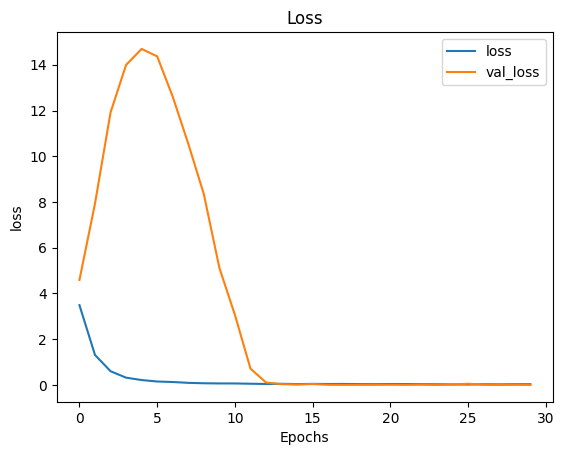

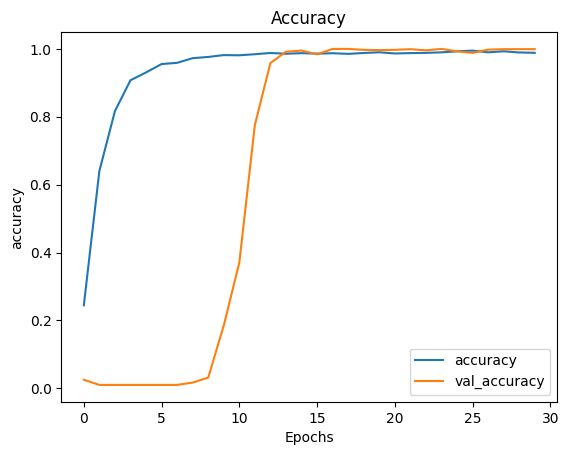

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Top2: 1.0000 - accuracy: 0.9991 - loss: 0.0018
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


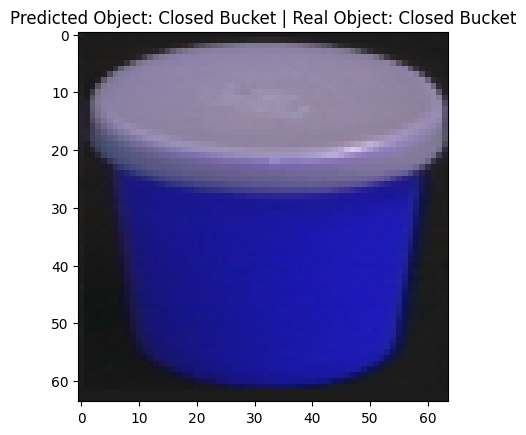

In [124]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, epochs=30)

# Elu

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,222,308 (16.11 MB)

 Trainable params: 4,222,180 (16.11 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - Top2: 0.5413 - accuracy: 0.4728 - loss: 3.3088 - val_Top2: 0.3944 - val_accuracy: 0.2403 - val_loss: 3.1342
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 535ms/step - Top2: 0.9957 - accuracy: 0.9780 - loss: 0.0858 - val_Top2: 0.5847 - val_accuracy: 0.3688 - val_loss: 2.6010
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 572ms/step - Top2: 1.0000 - accuracy: 0.9960 - loss: 0.0175 - val_Top2: 0.6174 - val_accuracy: 0.4403 - val_loss: 2.2944
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - Top2: 1.0000 - accuracy: 0.9994 - loss: 0.0048 - val_Top2: 0.6736 - val_accuracy: 0.4826 - val_loss: 1.9769
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 548ms/step - Top2: 1.0000 - accuracy: 0.9979 - loss: 0.0084 - val_Top2: 0.7569 - val_accuracy: 0.5444 - val_loss: 1.6322
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 29s 639ms/step - Top2: 1.0000 - accuracy: 0.9979 - loss: 0.0082 - val_Top2: 0.8514 - val_accuracy: 0.6479 - val_loss: 1.2621
Epoch 7/10
45/45 ━━━━━

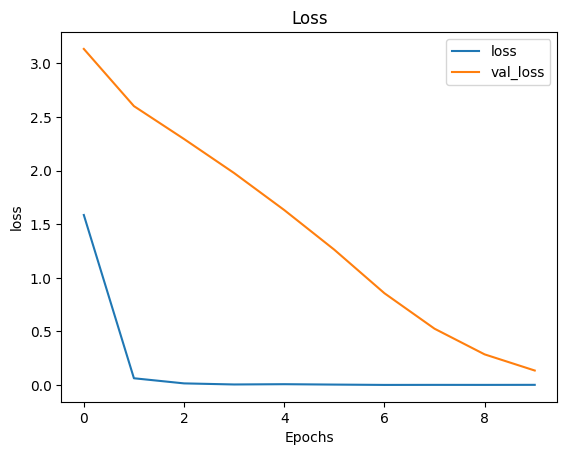

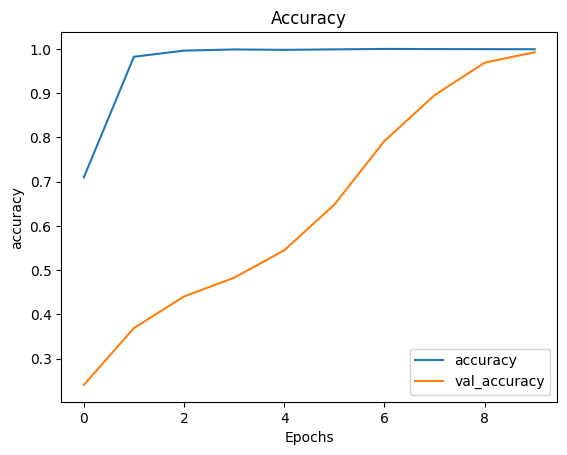

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - Top2: 1.0000 - accuracy: 0.9912 - loss: 0.1342
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


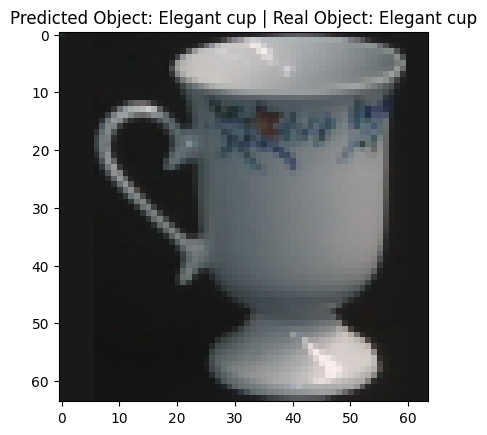

In [126]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='elu'))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Gelu

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,222,308 (16.11 MB)

 Trainable params: 4,222,180 (16.11 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 865ms/step - Top2: 0.5588 - accuracy: 0.4827 - loss: 2.7602 - val_Top2: 0.4722 - val_accuracy: 0.2743 - val_loss: 3.7167
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 843ms/step - Top2: 0.9960 - accuracy: 0.9875 - loss: 0.0620 - val_Top2: 0.6972 - val_accuracy: 0.5236 - val_loss: 3.3205
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 842ms/step - Top2: 0.9997 - accuracy: 0.9970 - loss: 0.0134 - val_Top2: 0.9007 - val_accuracy: 0.7743 - val_loss: 2.9331
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 835ms/step - Top2: 1.0000 - accuracy: 0.9980 - loss: 0.0100 - val_Top2: 0.9847 - val_accuracy: 0.9326 - val_loss: 2.5181
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 890ms/step - Top2: 0.9996 - accuracy: 0.9968 - loss: 0.0156 - val_Top2: 0.9951 - val_accuracy: 0.9667 - val_loss: 2.0771
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 833ms/step - Top2: 1.0000 - accuracy: 0.9994 - loss: 0.0030 - val_Top2: 0.9958 - val_accuracy: 0.9778 - val_loss: 1.5738
Epoch 7/10
45/45 ━━━━━

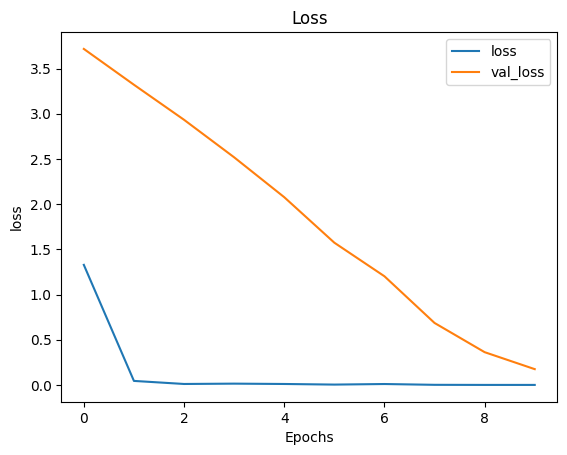

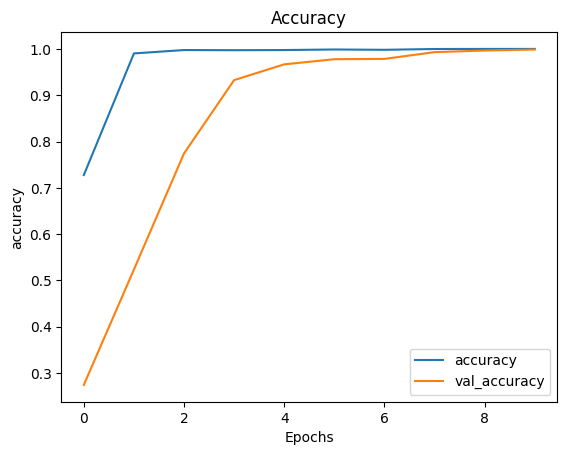

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - Top2: 1.0000 - accuracy: 0.9960 - loss: 0.1754
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step


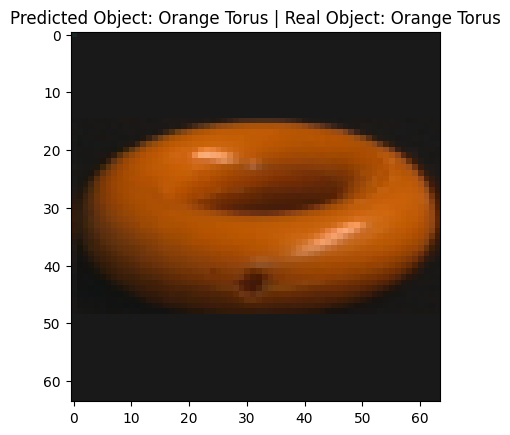

In [127]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='gelu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='gelu'))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Gelu + Learning Rate

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,222,308 (16.11 MB)

 Trainable params: 4,222,180 (16.11 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 827ms/step - Top2: 0.1165 - accuracy: 0.0752 - loss: 4.4006 - val_Top2: 0.1819 - val_accuracy: 0.1236 - val_loss: 4.5431
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 865ms/step - Top2: 0.5409 - accuracy: 0.4282 - loss: 2.9802 - val_Top2: 0.3521 - val_accuracy: 0.2271 - val_loss: 4.4603
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 43s 899ms/step - Top2: 0.7744 - accuracy: 0.6666 - loss: 1.9932 - val_Top2: 0.6438 - val_accuracy: 0.4542 - val_loss: 4.3446
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 940ms/step - Top2: 0.8894 - accuracy: 0.8247 - loss: 1.3636 - val_Top2: 0.7986 - val_accuracy: 0.6389 - val_loss: 4.1840
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 903ms/step - Top2: 0.9302 - accuracy: 0.8781 - loss: 0.9927 - val_Top2: 0.8833 - val_accuracy: 0.7479 - val_loss: 3.9658
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 43s 959ms/step - Top2: 0.9562 - accuracy: 0.9254 - loss: 0.7321 - val_Top2: 0.9319 - val_accuracy: 0.8132 - val_loss: 3.6738
Epoch 7/10
45/45 ━━━━━

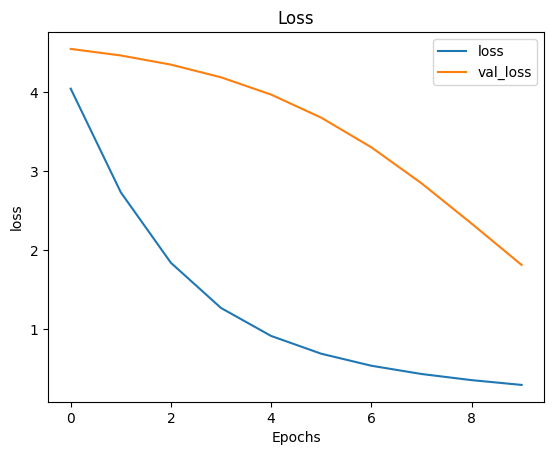

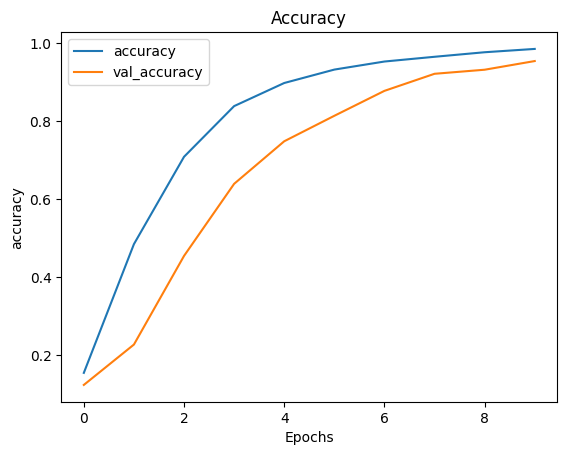

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - Top2: 0.9819 - accuracy: 0.9576 - loss: 1.8048
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step


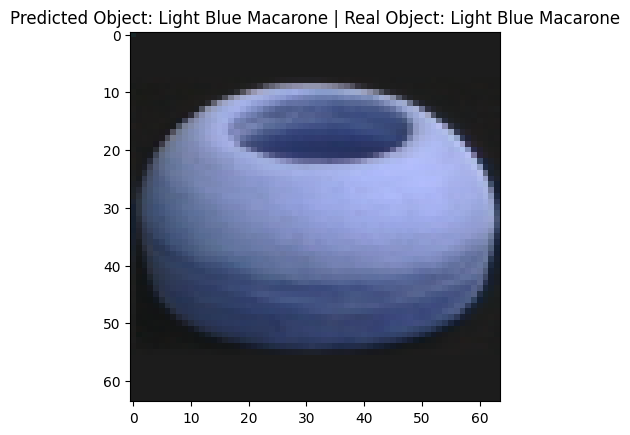

In [131]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(64, 64,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='gelu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='gelu'))
model.add(tf.keras.layers.Dense(y_test_cat.shape[1], activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)